I combined all the code lines I said should be at the begining of your code.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

## Importing mltools
First you want to make sure it sits in the same folder or wherever you put your PYTHON_PATH pointer to. By default it will be the same folder you're running things from (which is the case here).

You can see that I have that folder in my directory.

In [4]:
!ls

HW1-code    loading_data_and_plotting.ipynb  README.md
HW1s.ipynb  mltools			     using_mltools_package.ipynb


With having it there, I can just import it use it as said in the HW assignement.

In [5]:
import mltools as ml
# If this prints error you either defined the PYTHON_PATH to point to somewhere else or entered a different directory.

## Using mltools

In [6]:
path_to_file = 'HW1-code/data/iris.txt'
iris = np.genfromtxt(path_to_file, delimiter=None) # Loading thet txt file
X = iris[:, :-1]   # Features are the first 4 columns
Y = iris[:, -1]    # Classes are the last column

One important tool that you will use ALL the time is the shuffle and split data methods. The shuffle is used to add randomality to the order of points in case the order of them was some indication of something. The split allows you to create train and test data easily.

In [9]:
X, Y = ml.shuffleData(X, Y) ## MAKE SURE YOU HAVE BOTH X AND Y!!! (Why?)

# It's still the same size, just different order

In [11]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)   # Splitting keeping 75% as training and the rest as validation

A common mistake here is to split and then forget to use the new splitted data and use X, Y instead.

## KNN Classifier

You can read about it on the [wiki page](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) or in your notes.

In [12]:
# Creating an classifier.
knn = ml.knn.knnClassify()

# Training the classifier.
knn.train(Xtr, Ytr, K=5)  # What is this thing doing? (Look at the code)

# Making predictions
YvaHat = knn.predict(Xva)

A VERY good practice thing you should do after you make predictions is to make sure all the dimensions match. That way you at least know that you probably ran it on the right data.

## Plotting the classifier and predictions

This is useful if you have 2D data (or 1D for that matter). To show how it works we'll repeat the process  using only the first two columns of X. 

We plot the areas of classification and the training data.

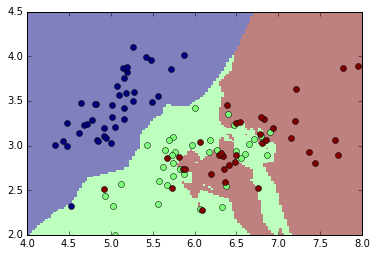

In [18]:
knn = ml.knn.knnClassify()
knn.train(Xtr[:, :2], Ytr, K=5)

ml.plotClassify2D(knn, Xtr[:, :2], Ytr)
plt.show()

Now let's plot the test data with the predicted class. Notice that to do so I just had to change the set of points and classes that I give the plotClassify2D method.

In [20]:
YvaHat = knn.predict(Xva[:, :2])

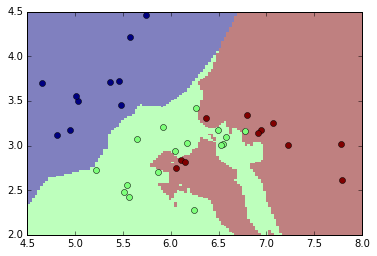

In [25]:
ml.plotClassify2D(knn, Xva[:, :2], YvaHat)
plt.show()

In the plot above we plotted the test data with the predicted class. That's why it looks perfectly correct. Next we'll plot the test data with the true class. 

Now we can see some mistakes.

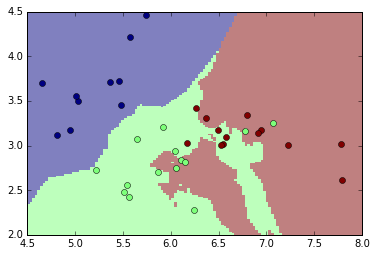

In [23]:
ml.plotClassify2D(knn, Xva[:, :2], Yva)
plt.show()

### Plotting Error

In the HW assignment you are required to plot the error for the training and validation using the samilogx method. To show you how to do that, I'll use a random errors.

In my plotting I will use a more commonly used way of plotting using the axis handler. This way gives a lot more control though I will not demondtrate that too much here. I will try to do add new plotting stuff every new discussion as producing nice plots is 80% of the job for a data scientist :)

In [26]:
K = [1, 2, 5, 10, 50, 100, 200]
train_err = np.ones(7) * np.random.rand(7)
val_err = np.ones(7) * np.random.rand(7)

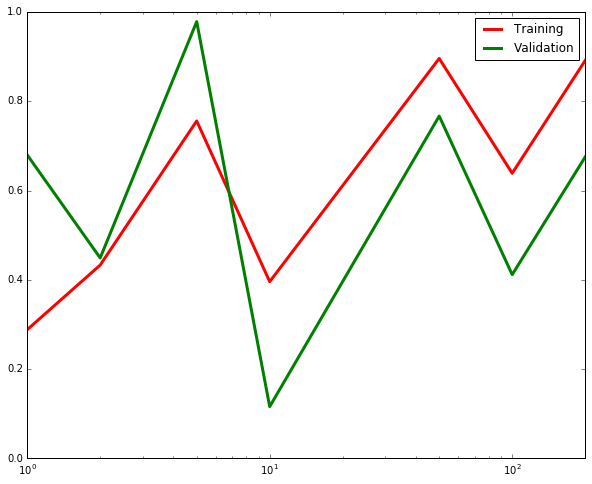

In [28]:
# Creating subplots with just one subplot so basically a single figure.
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# I added lw (line width) and the label. 
ax.semilogx(K, train_err, 'r-', lw=3, label='Training')
ax.semilogx(K, val_err, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# Controlling the axis.
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# And still doing this to clean the canvas.
plt.show()


Remeber that this was just an example with random number, you won't be able to deduce anything from this.